# Wind Rose for Sacramento

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
!pip install windrose
from windrose import WindroseAxes
import matplotlib.cm as cm
from matplotlib import colors

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ben-shao/Airport-risk-assessment/main/windrose_test/72494523293_1973_2020_SanJose_cc_trimmed.csv", parse_dates=["Date"])

df.index = df.Date

df = df.resample("H").first()

In [4]:
df.head()

,Date,WindDir,WindSpeed
Date,,,
1973-01-01 00:00:00,1973-01-01 00:00:00,360.0,9.2
1973-01-01 01:00:00,1973-01-01 01:00:00,360.0,8.2
1973-01-01 02:00:00,1973-01-01 02:00:00,10.0,7.2
1973-01-01 03:00:00,1973-01-01 03:00:00,20.0,6.1
1973-01-01 04:00:00,1973-01-01 04:00:00,260.0,1.5


In [5]:
df = df[df.WindSpeed < 999]
df_still = df[df.WindSpeed == 0]
df_windy = df[df.WindSpeed > 0]

df_windy = df_windy[df_windy.WindDir < 999]


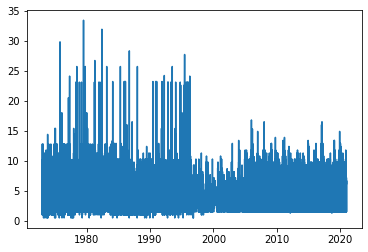

In [6]:
plt.plot(df_windy.WindSpeed)

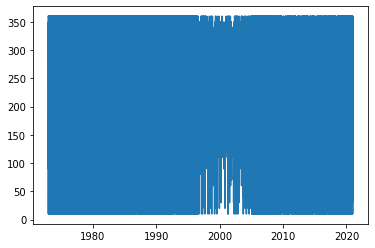

In [7]:
plt.plot(df_windy.WindDir)

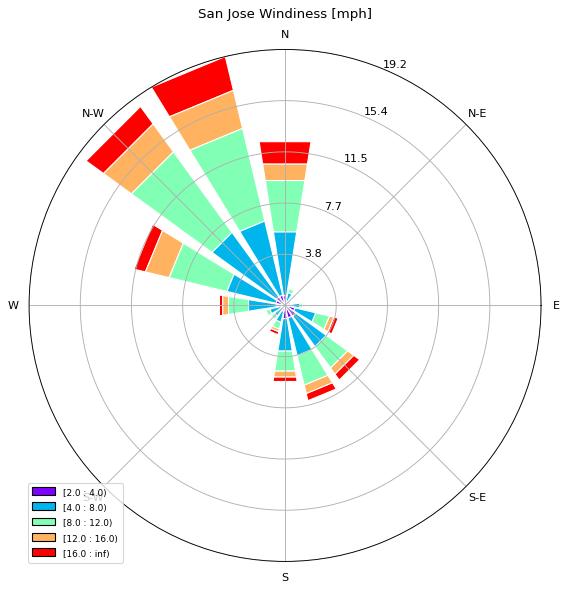

In [9]:
ax = WindroseAxes.from_ax()
ax.set_title("San Jose Windiness [mph]")
hist = ax.bar(df_windy.WindDir, df_windy.WindSpeed*2.237, normed=True, opening=0.8, edgecolor='white', bins=[2, 4, 8, 12, 16], cmap=cm.rainbow)
# ax.set_ylim([0, 35])
# ax.set_yticks([10, 20, 30])
# ax.set_yticklabels(["10%", "20%", "30%"])
ax.set_legend()
plt.savefig("windrose_sjc.svg", transparent=True)